# Data Preparation and Modelling

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [2]:
# Loading the dataset
df = pd.read_csv("C:\\Users\\yozil\\Desktop\\My projects\\3.0 Breast_Cancer_Detection\\Breast_Cancer_Detection\\data\\processed\\breast cancer cleaned data.csv")

In [3]:
# displaying sample records
df.sample(3)

,Id,Diagnosis,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave Points_Mean,Symmetry_Mean,Fractal_Dimension_Mean,Radius_Se,Texture_Se,Perimeter_Se,Area_Se,Smoothness_Se,Compactness_Se,Concavity_Se,Concave Points_Se,Symmetry_Se,Fractal_Dimension_Se,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave Points_Worst,Symmetry_Worst,Fractal_Dimension_Worst
376,904969,B,12.34,14.95,78.29,469.1,0.08682,0.04571,0.02109,0.02054,0.1571,0.05708,0.3833,0.9078,2.602,30.15,0.007702,0.008491,0.01307,0.010300,0.02970,0.001432,13.18,16.85,84.11,533.1,0.1048,0.06744,0.04921,0.04793,0.2298,0.05974
195,8810528,B,11.84,18.94,75.51,428.0,0.08871,0.06900,0.02669,0.01393,0.1533,0.06057,0.2222,0.8652,1.444,17.12,0.005517,0.017270,0.02045,0.006747,0.01616,0.002922,13.30,24.99,85.22,546.3,0.1280,0.18800,0.14710,0.06913,0.2535,0.07993
299,894618,M,20.16,19.66,131.10,1274.0,0.08020,0.08564,0.11550,0.07726,0.1928,0.05096,0.5925,0.6863,3.868,74.85,0.004536,0.013760,0.02645,0.012470,0.02193,0.001589,23.06,23.03,150.20,1657.0,0.1054,0.15370,0.26060,0.14250,0.3055,0.05933


### 1. Encoding Categorical Variables

In [4]:
# here we will perform encoding of categorical variables
len(df.select_dtypes("object").columns)

1

In [5]:
# No of distinct classes in the diagnosis variable
df.Diagnosis.nunique()

2

In [6]:
# unique values in the diagnosis variable
df.Diagnosis.unique()

array(['M', 'B'], dtype=object)

In [7]:
# we have only one variable with a categgorical data.
df = pd.get_dummies(df,dtype="int", drop_first=True)

In [8]:
df

,Id,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave Points_Mean,Symmetry_Mean,Fractal_Dimension_Mean,Radius_Se,Texture_Se,Perimeter_Se,Area_Se,Smoothness_Se,Compactness_Se,Concavity_Se,Concave Points_Se,Symmetry_Se,Fractal_Dimension_Se,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave Points_Worst,Symmetry_Worst,Fractal_Dimension_Worst,Diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
4,843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
531,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
532,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
533,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [9]:
df.Diagnosis_M

0      1
1      1
2      1
3      1
4      1
      ..
530    1
531    1
532    1
533    1
534    0
Name: Diagnosis_M, Length: 535, dtype: int32

### 2. Correlation Matrix

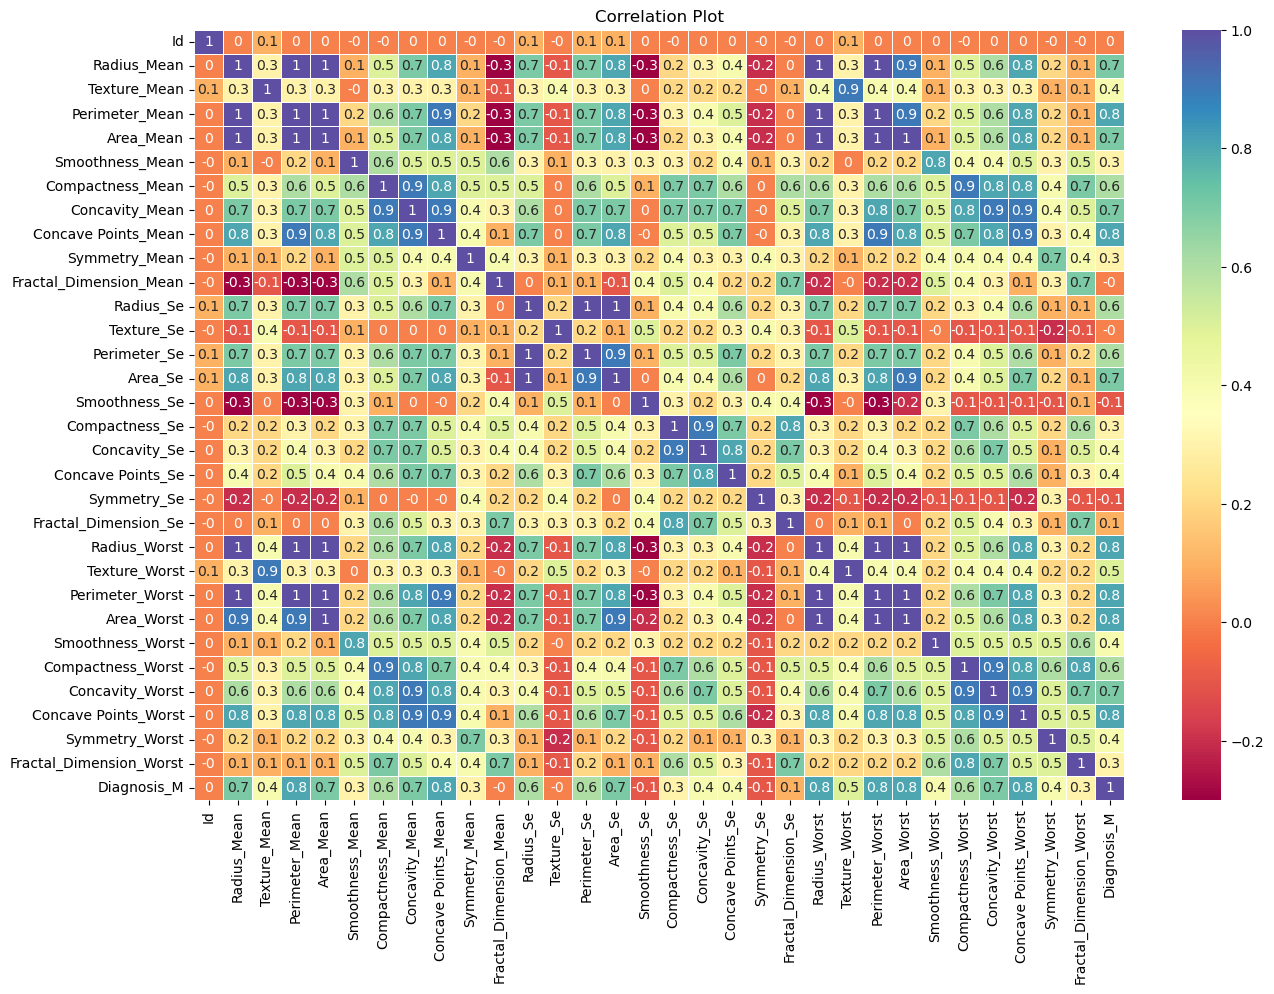

In [10]:
# Now let's draw the correlation plot
plt.figure(figsize=(15,10))
sns.heatmap(df.corr().round(1),cmap = "Spectral",linewidths=0.5,annot=True)
plt.title("Correlation Plot")
plt.savefig("C:\\Users\\yozil\\Desktop\\My projects\\3.0 Breast_Cancer_Detection\\Breast_Cancer_Detection\\models\\1.0 Correlation_Plot.jpg")
plt.show()

In [11]:
df2 = df.drop("Diagnosis_M", axis = 1)

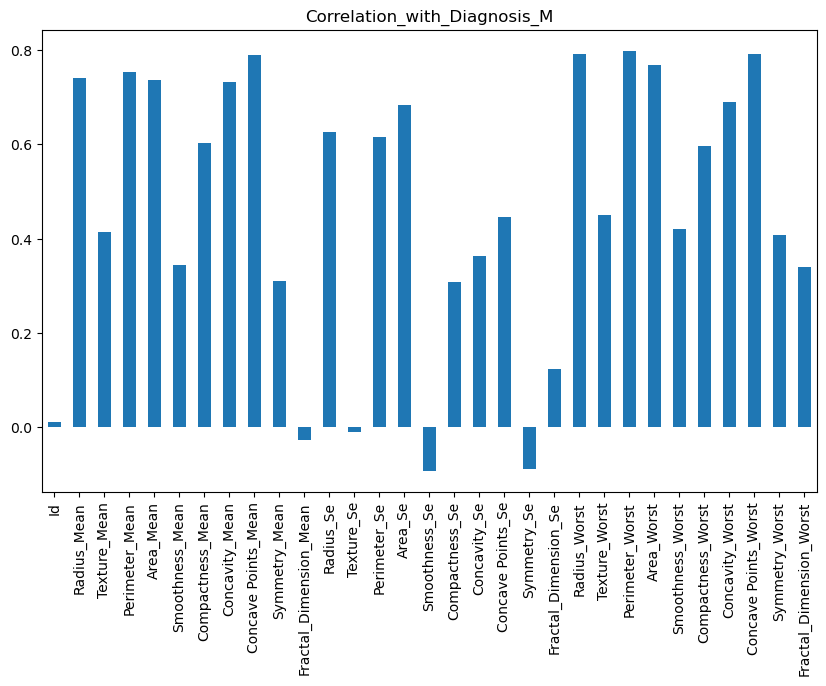

In [12]:
plt.figure(figsize=(10,6))
df2.corrwith(df["Diagnosis_M"]).plot.bar()
plt.title("Correlation_with_Diagnosis_M")
plt.savefig("C:\\Users\\yozil\\Desktop\\My projects\\3.0 Breast_Cancer_Detection\\Breast_Cancer_Detection\\models\\2.0 Correlation with Diagnosis_M variable.jpg")
plt.show()

In [13]:
# we can also see the correlation matrix 
df.corr()

,Id,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave Points_Mean,Symmetry_Mean,Fractal_Dimension_Mean,Radius_Se,Texture_Se,Perimeter_Se,Area_Se,Smoothness_Se,Compactness_Se,Concavity_Se,Concave Points_Se,Symmetry_Se,Fractal_Dimension_Se,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave Points_Worst,Symmetry_Worst,Fractal_Dimension_Worst,Diagnosis_M
Id,1.000000,0.023050,0.066025,0.020227,0.032571,-0.026139,-0.021249,0.006738,0.008663,-0.001037,-0.033845,0.065649,-0.011062,0.062125,0.068418,0.008403,-0.024045,0.005776,0.005668,-0.000055,-0.016421,0.033214,0.050330,0.029088,0.040420,0.015410,-0.010989,0.005310,0.013167,-0.013238,-0.016165,0.010027
Radius_Mean,0.023050,1.000000,0.324075,0.998023,0.991148,0.147949,0.532122,0.707358,0.823061,0.134102,-0.318541,0.655268,-0.126067,0.651576,0.787079,-0.301187,0.243036,0.317688,0.440274,-0.195644,0.001806,0.970820,0.300463,0.965318,0.948064,0.126216,0.468090,0.594226,0.767070,0.189257,0.068574,0.741795
Texture_Mean,0.066025,0.324075,1.000000,0.331483,0.333250,-0.009975,0.260341,0.335440,0.310342,0.091522,-0.057276,0.313754,0.412087,0.323009,0.326552,0.027068,0.227497,0.230817,0.197916,-0.008647,0.114068,0.351148,0.914234,0.358657,0.352430,0.106940,0.288756,0.319922,0.302262,0.113550,0.138187,0.413193
Perimeter_Mean,0.020227,0.998023,0.331483,1.000000,0.989845,0.181781,0.580599,0.744870,0.850176,0.163106,-0.270882,0.666303,-0.118143,0.669410,0.795451,-0.283086,0.286436,0.354758,0.467808,-0.185112,0.041339,0.971880,0.308130,0.971405,0.949505,0.156561,0.509822,0.629924,0.793209,0.208285,0.112037,0.754753
Area_Mean,0.032571,0.991148,0.333250,0.989845,1.000000,0.147088,0.526101,0.712816,0.825994,0.138518,-0.294912,0.687300,-0.100917,0.682392,0.820267,-0.253235,0.247869,0.323907,0.438405,-0.171518,0.021331,0.969985,0.303622,0.964734,0.964566,0.133038,0.452580,0.585012,0.754990,0.177941,0.070680,0.737568
Smoothness_Mean,-0.026139,0.147949,-0.009975,0.181781,0.147088,1.000000,0.620537,0.482065,0.526359,0.514315,0.575940,0.291523,0.095301,0.286948,0.253213,0.315642,0.266036,0.234876,0.369903,0.106887,0.293940,0.201054,0.048648,0.223238,0.195001,0.799662,0.434811,0.402362,0.473822,0.342484,0.480102,0.343429
Compactness_Mean,-0.021249,0.532122,0.260341,0.580599,0.526101,0.620537,1.000000,0.892775,0.834874,0.529859,0.523262,0.521916,0.015653,0.585819,0.546813,0.078231,0.740692,0.678928,0.643890,0.044954,0.555003,0.570575,0.263678,0.623903,0.553740,0.549332,0.877541,0.830420,0.818362,0.439876,0.689147,0.603299
Concavity_Mean,0.006738,0.707358,0.335440,0.744870,0.712816,0.482065,0.892775,1.000000,0.933050,0.427628,0.278728,0.626100,0.037263,0.672772,0.683983,0.022076,0.656987,0.739364,0.666359,-0.006422,0.452136,0.728748,0.334674,0.768624,0.718930,0.454974,0.787888,0.903320,0.877030,0.361714,0.532552,0.733300
Concave Points_Mean,0.008663,0.823061,0.310342,0.850176,0.825994,0.526359,0.834874,0.933050,1.000000,0.411973,0.140599,0.702219,0.006558,0.725078,0.772583,-0.026212,0.503354,0.544464,0.657679,-0.035739,0.299282,0.837910,0.309915,0.861711,0.825052,0.453404,0.693030,0.786472,0.917477,0.346960,0.396627,0.789400
Symmetry_Mean,-0.001037,0.134102,0.091522,0.163106,0.138518,0.514315,0.529859,0.427628,0.411973,1.000000,0.408575,0.308947,0.123356,0.312115,0.256969,0.199935,0.355955,0.295083,0.333754,0.366274,0.307876,0.175294,0.100695,0.200500,0.171814,0.397458,0.415505,0.369154,0.369194,0.667045,0.385490,0.309074


### 3. Splitting the Dataset

In [14]:
# first let's import the train test split module form the scikit learn library
from sklearn.model_selection import train_test_split

In [15]:
# Now let's specify our dependent and independent variables
x = df.drop("Diagnosis_M", axis = 1) # independent_variable
y = df.Diagnosis_M  # dependent variable

In [16]:
# shape of the independent variable
x.shape

(535, 31)

In [17]:
# shape of the dependent variable
y.shape

(535,)

In [18]:
# splitting the dataset in to trianing and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42,test_size=0.15)

In [19]:
# shape of the independetn trian 
x_train.shape

(454, 31)

In [20]:
# shape of the dependetn trian
y_train.shape

(454,)

In [21]:
# shape of the independetn test
x_test.shape

(81, 31)

In [22]:
# shape of the dependetn test
y_test.shape

(81,)

### 4. Feature Scalling

In [23]:
# let's import the feature scalling module from scikit library
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()

In [25]:
sc

StandardScaler()

In [26]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### 5. Model Building

##### 5.1 Logistic Regression

In [27]:
# now let's import the necessary libraries for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
lrc = LogisticRegression()

In [29]:
lrc

LogisticRegression()

In [30]:
lrc.fit(x_train,y_train)

LogisticRegression()

In [31]:
# making prediction using the model
prediction = lrc.predict(x_test)

In [32]:
my_dic = {"actual":y_test,"prediction":prediction}

In [33]:
pd.DataFrame(my_dic)

,actual,prediction
117,1,1
132,0,0
154,0,0
245,1,1
84,0,0
...,...,...
453,0,0
311,0,0
442,0,0
33,0,0


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [35]:
acc = accuracy_score(y_test,prediction)
pre = precision_score(y_test,prediction)
rec = recall_score(y_test,prediction)
f1 = f1_score(y_test,prediction)

In [36]:
evaluation_metrices = ["Accuarcy","Precision","Recall","F1_Score"]

In [37]:
values = [acc,pre,rec,f1]

In [38]:
pd.DataFrame(values,index = [evaluation_metrices], columns = ["Results"])

,Results
Accuarcy,0.975309
Precision,1.000000
Recall,0.944444
F1_Score,0.971429


In [39]:
# Classification Report
cr = classification_report(y_test,prediction)
print(cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        45
           1       1.00      0.94      0.97        36

    accuracy                           0.98        81
   macro avg       0.98      0.97      0.97        81
weighted avg       0.98      0.98      0.98        81



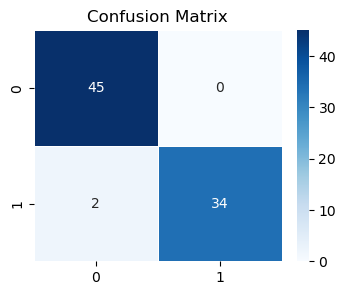

In [40]:
# confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,prediction), cmap = "Blues", annot = True, linewidth = 0.5)
plt.title("Confusion Matrix")
plt.savefig("C:\\Users\\yozil\\Desktop\\My projects\\3.0 Breast_Cancer_Detection\\Breast_Cancer_Detection\\models\\3.0 Confusion Matrix.jpg")
plt.show()

In [43]:
# Now let's save our model result
import joblib
joblib.dump(lrc, 'C:\\Users\\yozil\\Desktop\\My projects\\3.0 Breast_Cancer_Detection\\Breast_Cancer_Detection\\models\\logistic_regression_model.pkl')

['C:\\Users\\yozil\\Desktop\\My projects\\3.0 Breast_Cancer_Detection\\Breast_Cancer_Detection\\models\\logistic_regression_model.pkl']

##### 5.1.1 Logistic Regression with Cross Validation

In [49]:
# importing the necessary libraries
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator =  lrc, X = x_train, y = y_train, cv = 5)

In [51]:
# accuracy
accuracies

array([0.98901099, 0.97802198, 0.97802198, 1.        , 0.96666667])

In [52]:
# mean accuracy and standard-devaiation
accuracies.mean()

0.9823443223443225

In [54]:
# we are achieves mean accuracy of 0.98 with a standard deviation of 0.0113
accuracies.std()

0.01130771069982403

#### 5.2 Random Forest Classifier

In [55]:
# importing the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [56]:
rfc = RandomForestClassifier()
rfc

RandomForestClassifier()

In [57]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [58]:
# model_evaluation
rf_pred = rfc.predict(x_test)

In [59]:
my_dict = {"actual":y_test, "Prediction":rf_pred}

In [60]:
pd.DataFrame(my_dic)

,actual,prediction
117,1,1
132,0,0
154,0,0
245,1,1
84,0,0
...,...,...
453,0,0
311,0,0
442,0,0
33,0,0


In [61]:
acc = accuracy_score(y_test,prediction)
prec = precision_score(y_test, prediction)
f1_sc = f1_score(y_test,prediction)
reca = recall_score(y_test,prediction)

In [62]:
# evaluation results
pd.DataFrame([acc,prec,f1_sc,reca],index=["accuracy","precision","f1_score","recall"],columns= [ "value"])

,value
accuracy,0.975309
precision,1.000000
f1_score,0.971429
recall,0.944444


In [64]:
# classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        45
           1       1.00      0.94      0.97        36

    accuracy                           0.98        81
   macro avg       0.98      0.97      0.97        81
weighted avg       0.98      0.98      0.98        81



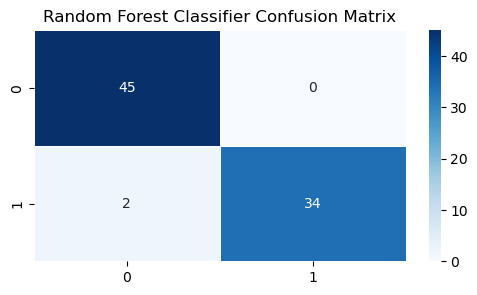

In [71]:
# Confusion Matrix
plt.figure(figsize=(6,3))
sns.heatmap(confusion_matrix(y_test,prediction),cmap="Blues",annot=True,linewidths=0.5)
plt.title("Random Forest Classifier Confusion Matrix")
plt.savefig("C:\\Users\\yozil\\Desktop\\My projects\\3.0 Breast_Cancer_Detection\\Breast_Cancer_Detection\\models\\4.0 random forest classifier confusion matrix.jpg")
plt.show()

In [74]:
# Saving the random forest classifier model
import joblib
joblib.dump(rfc ,"C:\\Users\\yozil\\Desktop\\My projects\\3.0 Breast_Cancer_Detection\\Breast_Cancer_Detection\\models\\random_forest_classifier.pkl")

['C:\\Users\\yozil\\Desktop\\My projects\\3.0 Breast_Cancer_Detection\\Breast_Cancer_Detection\\models\\random_forest_classifier.pkl']

##### 5.2.1 Random Forest Classifier with Cross Validation

In [75]:
# import the necessary libraries
from sklearn.model_selection import cross_val_score

In [77]:
accuracies = cross_val_score(estimator = rfc, X = x_train, y = y_train)

In [78]:
accuracies

array([0.98901099, 0.89010989, 0.96703297, 0.95604396, 0.96666667])

In [79]:
# mean accuracy
accuracies.mean()

0.9537728937728938

In [80]:
# standard deviation of accuracies
accuracies.std()

0.03359148117467416

here we are able to achieve a mean accuracies of 0.95% using a random forest classifier

#### So on basis of Cross validation score i select logistic regression model as my best model.